### **MODELS IMPLEMENTED**

### **4.** **NAIVE BAYES**

Naïve Bayes is a supervised classification algorithm based on Bayes' Theorem. It assumes that features are independent of each other given the class label—a "naïve" assumption that simplifies the computation. Despite this simplification, Naïve Bayes often performs well in practice, especially with high-dimensional data.

This algorithm is commonly used in applications such as spam detection, text classification, and sentiment analysis due to its speed and efficiency. Scikit-learn provides multiple variants of Naïve Bayes, including:

- **GaussianNB** – for continuous, normally distributed data  
- **MultinomialNB** – for count-based data, such as word frequencies  
- **BernoulliNB** – for binary/boolean feature vectors  
- **CategoricalNB** – for categorical (discrete, labeled) input features


In [33]:
import pandas as pd

# Load the uploaded CSV file
file_path = '/content/bank_cleaned_data.csv'
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(None,
    age           job  marital  education default  balance housing loan  \
 0   58    management  married   tertiary      no     2143     yes   no   
 1   44    technician   single  secondary      no       29     yes   no   
 2   33  entrepreneur  married  secondary      no        2     yes  yes   
 3   47   blue-collar  married  secondary      no     1506     yes   no   
 4   33   blue-collar   single  secondary      no        1      no   no   
 
    contact  day_of_week month  duration  campaign  pdays  previous poutcome  \
 0  Unknown            5   may       261         1     -1         0  Unknown   
 1  Unknown            5   may       151         1     -1         0  Unknown   
 2  Unknown            5   may        76         1     -1         0  Unknown   
 3  Unknown            5   may        92         1     -1         0  Unknown   
 4  Unknown            5   may       198         1     -1         0  Unknown   
 
     y  
 0  no  
 1  no  
 2  no  
 3  no  
 4  no  )

### 1. Multinomial Naive Bayes

The Multinomial Naive Bayes algorithm was selected for this task due to its effectiveness in handling categorical and count-based data, particularly in classification problems with high-dimensional feature spaces.

After careful preprocessing—binning numerical values and one-hot encoding categorical variables—the model was trained to predict whether a client would subscribe to a term deposit.

In [34]:
import pandas as pd
import numpy as np

# For data splitting and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer

# Naive Bayes variants
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB

# For evaluation
from sklearn.metrics import accuracy_score, classification_report

# Set a random state for reproducibility
RANDOM_STATE = 42

**Data Preparation for MultinomialNB**

Multinomial Naive Bayes works best with discrete counts/features. We will:

* Drop columns not suitable for this model: 'duration', 'pdays', and 'day_of_week'.

* Discretize numeric columns (e.g., age, balance, campaign, previous) into multiple bins.

* One-hot encode the remaining categorical features.

* Convert the target variable (y) into numeric form using LabelEncoder.

In [35]:
# Make a copy so as not to interfere with further models
df_mnb = df.copy()

# 1. Drop columns
df_mnb.drop(columns=['duration', 'pdays', 'day_of_week'], inplace=True, errors='ignore')

# 2. Discretize numeric columns
bin_features = ['age', 'balance', 'campaign', 'previous']
binner = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df_mnb[bin_features] = binner.fit_transform(df_mnb[bin_features])

# 3. One-hot encode categorical features
categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'poutcome']
df_mnb_encoded = pd.get_dummies(df_mnb, columns=categorical_cols)

# 4. Separate features and target
X_mnb = df_mnb_encoded.drop(columns=['y'])
y_mnb = LabelEncoder().fit_transform(df_mnb_encoded['y'])  # 'no' → 0, 'yes' → 1

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [36]:
# Train and Evaluate MultinomialNB
# Split into train/test sets
X_mnb_train, X_mnb_test, y_mnb_train, y_mnb_test = train_test_split(
    X_mnb, y_mnb, test_size=0.2, random_state=RANDOM_STATE
)

# Initialize and train model
mnb_model = MultinomialNB()
mnb_model.fit(X_mnb_train, y_mnb_train)

# Predict
y_mnb_pred = mnb_model.predict(X_mnb_test)

# Evaluation
mnb_accuracy = accuracy_score(y_mnb_test, y_mnb_pred)
mnb_report = classification_report(y_mnb_test, y_mnb_pred, target_names=["no", "yes"])

print("=== MultinomialNB Results ===")
print(f"Accuracy: {mnb_accuracy:.4f}")
print("\nClassification Report:")
print(mnb_report)

=== MultinomialNB Results ===
Accuracy: 0.8865

Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7952
         yes       0.55      0.31      0.40      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.64      0.67      9043
weighted avg       0.87      0.89      0.87      9043



The Multinomial Naive Bayes model achieved an overall accuracy of 88.65% on the test set. For the dominant "no" class (with 7,952 samples), the model demonstrated high precision (0.91) and high recall (0.97), indicating it very accurately identifies and correctly classifies "no." However, for the minority "yes" class (1,091 samples), the precision drops to 0.55 and recall to 0.31, leading to a relatively lower F1-score of 0.40.

In [37]:
# (A) Full MNB dataset
X_mnb_reset = X_mnb.reset_index(drop=True)
y_mnb_series = pd.Series(y_mnb, name="y").reset_index(drop=True)
df_mnb_full = pd.concat([X_mnb_reset, y_mnb_series], axis=1)
df_mnb_full.to_csv("prepared_bank_data_nb.csv", index=False)

# (B) Training set
X_mnb_train_reset = X_mnb_train.reset_index(drop=True)
y_mnb_train_series = pd.Series(y_mnb_train, name="y").reset_index(drop=True)
df_mnb_train = pd.concat([X_mnb_train_reset, y_mnb_train_series], axis=1)
df_mnb_train.to_csv("train_data_nb.csv", index=False)

# (C) Test set
X_mnb_test_reset = X_mnb_test.reset_index(drop=True)
y_mnb_test_series = pd.Series(y_mnb_test, name="y").reset_index(drop=True)
df_mnb_test = pd.concat([X_mnb_test_reset, y_mnb_test_series], axis=1)
df_mnb_test.to_csv("test_data_nb.csv", index=False)

print("\nFiles saved:")
print("→ prepared_bank_data_nb.csv")
print("→ train_data_nb.csv")
print("→ test_data_nb.csv")


Files saved:
→ prepared_bank_data_nb.csv
→ train_data_nb.csv
→ test_data_nb.csv


In [38]:
for file_path in ["prepared_bank_data_nb.csv", "train_data_nb.csv", "test_data_nb.csv"]:
    df_check = pd.read_csv(file_path)
    print(f"\n=== {file_path} ===")
    print("Shape:", df_check.shape)
    missing_vals = df_check.isnull().sum()
    total_missing = missing_vals.sum()
    if total_missing == 0:
        print("No missing values.")
    else:
        print("Missing values per column:")
        print(missing_vals[missing_vals > 0])


=== prepared_bank_data_nb.csv ===
Shape: (45211, 47)
No missing values.

=== train_data_nb.csv ===
Shape: (36168, 47)
No missing values.

=== test_data_nb.csv ===
Shape: (9043, 47)
No missing values.


### 2. BERNOULLI NAIVE BAYES

Bernoulli Naive Bayes is a variant of the Naive Bayes algorithm designed for binary/boolean feature inputs. It works well when features represent the presence or absence of a characteristic (e.g., yes/no, 0/1). In this case, after binarizing numeric columns and one-hot encoding categorical variables, the BernoulliNB model is trained to predict whether a client will subscribe to a term deposit. This approach is especially suitable when dealing with datasets that can be represented in a true/false format.

**Data Preparation for BernoulliNB**

* Drop the same unsuitable columns: 'duration', 'pdays', 'day_of_week'.

* Discretize (binarize) numeric features into 2 bins.

* One-hot encode categorical features.

* Convert data into integer binary format.

In [39]:
# Make a fresh copy from the original df
df_bernoulli = df.copy()

# 1. Drop columns
df_bernoulli.drop(columns=['duration', 'pdays', 'day_of_week'], inplace=True, errors='ignore')

# 2. Binarize numeric features
binner_bernoulli = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')
df_bernoulli[['age', 'balance', 'campaign', 'previous']] = binner_bernoulli.fit_transform(
    df_bernoulli[['age', 'balance', 'campaign', 'previous']]
)

# 3. One-hot encode categorical features
cat_features = ['job', 'marital', 'education', 'default', 'housing',
                'loan', 'contact', 'month', 'poutcome']
df_bernoulli = pd.get_dummies(df_bernoulli, columns=cat_features)

# 4. Convert to integer binary format
X_bern = df_bernoulli.drop(columns=["y"]).astype(int)
y_bern = LabelEncoder().fit_transform(df_bernoulli["y"])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [40]:
# Train and Evaluate BernoulliNB
# Train-test split
Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_bern, y_bern, test_size=0.2, random_state=RANDOM_STATE
)

# Train model
bernoulli_model = BernoulliNB()
bernoulli_model.fit(Xb_train, yb_train)

# Predict
yb_pred = bernoulli_model.predict(Xb_test)

# Evaluate
bernoulli_accuracy = accuracy_score(yb_test, yb_pred)
bernoulli_report = classification_report(yb_test, yb_pred, target_names=["no", "yes"])

print("=== BernoulliNB Results ===")
print(f"Accuracy: {bernoulli_accuracy:.4f}")
print("\nClassification Report:")
print(bernoulli_report)

=== BernoulliNB Results ===
Accuracy: 0.8616

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.92      0.92      7952
         yes       0.42      0.42      0.42      1091

    accuracy                           0.86      9043
   macro avg       0.67      0.67      0.67      9043
weighted avg       0.86      0.86      0.86      9043



The Bernoulli Naive Bayes model achieves an overall accuracy of 86.16%. It performs well for the majority "no" class (precision and recall both at 0.92), indicating it correctly identifies "no" most of the time. However, it struggles with the minority "yes" class (precision and recall at 0.42), suggesting a substantial number of "yes" instances are either missed or incorrectly labeled.

In [41]:
# 1. Reset index for the full Bernoulli dataset (X_bern + y_bern)
X_bern_reset = X_bern.reset_index(drop=True)
y_bern_reset = pd.Series(y_bern, name="y").reset_index(drop=True)
df_bern_full = pd.concat([X_bern_reset, y_bern_reset], axis=1)
df_bern_full.to_csv("prepared_bank_data_bernoulli.csv", index=False)

# 2. Reset index for train set
Xb_train_reset = Xb_train.reset_index(drop=True)
yb_train_reset = pd.Series(yb_train, name="y").reset_index(drop=True)
df_bern_train = pd.concat([Xb_train_reset, yb_train_reset], axis=1)
df_bern_train.to_csv("train_data_bernoulli.csv", index=False)

# 3. Reset index for test set
Xb_test_reset = Xb_test.reset_index(drop=True)
yb_test_reset = pd.Series(yb_test, name="y").reset_index(drop=True)
df_bern_test = pd.concat([Xb_test_reset, yb_test_reset], axis=1)
df_bern_test.to_csv("test_data_bernoulli.csv", index=False)

print("\nFiles saved:")
print("→ prepared_bank_data_bernoulli.csv")
print("→ train_data_bernoulli.csv")
print("→ test_data_bernoulli.csv")


Files saved:
→ prepared_bank_data_bernoulli.csv
→ train_data_bernoulli.csv
→ test_data_bernoulli.csv


In [42]:
for file_path in [
    "prepared_bank_data_bernoulli.csv",
    "train_data_bernoulli.csv",
    "test_data_bernoulli.csv"
]:
    df_check = pd.read_csv(file_path)
    print(f"\n=== {file_path} ===")
    print("Shape:", df_check.shape)
    missing_values = df_check.isnull().sum()
    if missing_values.sum() == 0:
        print("No missing values found.")
    else:
        print("Missing values:")
        print(missing_values[missing_values > 0])


=== prepared_bank_data_bernoulli.csv ===
Shape: (45211, 47)
No missing values found.

=== train_data_bernoulli.csv ===
Shape: (36168, 47)
No missing values found.

=== test_data_bernoulli.csv ===
Shape: (9043, 47)
No missing values found.


### 3. CATEGORICAL NAIVE BAYES

Categorical Naive Bayes is a Naive Bayes variant designed specifically for categorical (discrete) input features. It assumes that each feature follows a categorical distribution and works best when inputs are encoded as labeled categories. In this case, after binning numeric values and ordinally encoding categorical features, the CategoricalNB model is trained to predict whether a client will subscribe to a term deposit. This model is well-suited for structured data where inputs are naturally non-numeric and ordered.



**Data Preparation for CategoricalNB**

* Drop 'duration', 'pdays', 'day_of_week'.

* Bin numerical features (e.g., into 4 bins).

* Ordinal encode the categorical columns.

* Encode the target variable with LabelEncoder.

In [43]:
# Fresh copy
df_cat = df.copy()

# 1. Drop columns
df_cat.drop(columns=['duration', 'pdays', 'day_of_week'], inplace=True, errors='ignore')

# 2. Bin numerical features
binner_cat = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df_cat[['age', 'balance', 'campaign', 'previous']] = binner_cat.fit_transform(
    df_cat[['age', 'balance', 'campaign', 'previous']]
)

# 3. Ordinal encode categorical columns
cat_features = ['job', 'marital', 'education', 'default', 'housing',
                'loan', 'contact', 'month', 'poutcome']
df_cat[cat_features] = OrdinalEncoder().fit_transform(df_cat[cat_features])

# 4. Separate features and target
X_cat = df_cat.drop(columns=["y"])
y_cat = LabelEncoder().fit_transform(df_cat["y"])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [44]:
# Train-test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cat, y_cat, test_size=0.2, random_state=RANDOM_STATE
)

# Train model
cat_model = CategoricalNB()
cat_model.fit(Xc_train, yc_train)

# Predict
yc_pred = cat_model.predict(Xc_test)

# Evaluate
cat_accuracy = accuracy_score(yc_test, yc_pred)
cat_report = classification_report(yc_test, yc_pred, target_names=["no", "yes"])

print("=== CategoricalNB Results ===")
print(f"Accuracy: {cat_accuracy:.4f}")
print("\nClassification Report:")
print(cat_report)

=== CategoricalNB Results ===
Accuracy: 0.8857

Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.96      0.94      7952
         yes       0.54      0.32      0.41      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.64      0.67      9043
weighted avg       0.87      0.89      0.87      9043



The Categorical Naive Bayes model achieved an overall accuracy of 88.57% on the test set. While performance for the "no" class is strong (precision = 0.91, recall = 0.96), the model struggles with the "yes" class, showing a precision of 0.54 and recall of 0.32, leading to a modest F1-score of 0.41.

In [45]:
# 1. Reset index for full dataset (X_cat + y_cat)
X_cat_reset = X_cat.reset_index(drop=True)
y_cat_reset = pd.Series(y_cat, name="y").reset_index(drop=True)
pd.concat([X_cat_reset, y_cat_reset], axis=1).to_csv("prepared_bank_data_categorical.csv", index=False)

# 2. Reset index for train set
Xc_train_reset = Xc_train.reset_index(drop=True)
yc_train_reset = pd.Series(yc_train, name="y").reset_index(drop=True)
pd.concat([Xc_train_reset, yc_train_reset], axis=1).to_csv("train_data_categorical.csv", index=False)

# 3. Reset index for test set
Xc_test_reset = Xc_test.reset_index(drop=True)
yc_test_reset = pd.Series(yc_test, name="y").reset_index(drop=True)
pd.concat([Xc_test_reset, yc_test_reset], axis=1).to_csv("test_data_categorical.csv", index=False)

print("\nFiles saved (in the current working directory):")
print("→ prepared_bank_data_categorical.csv")
print("→ train_data_categorical.csv")
print("→ test_data_categorical.csv")


Files saved (in the current working directory):
→ prepared_bank_data_categorical.csv
→ train_data_categorical.csv
→ test_data_categorical.csv


In [46]:
# Check prepared_bank_data_categorical.csv
df_prepared_cat = pd.read_csv("prepared_bank_data_categorical.csv")
print("== prepared_bank_data_categorical.csv ==")
print("Shape:", df_prepared_cat.shape)
print("Missing values:\n", df_prepared_cat.isnull().sum())
print("-" * 50)

# Check train_data_categorical.csv
df_train_cat = pd.read_csv("train_data_categorical.csv")
print("== train_data_categorical.csv ==")
print("Shape:", df_train_cat.shape)
print("Missing values:\n", df_train_cat.isnull().sum())
print("-" * 50)

# Check test_data_categorical.csv
df_test_cat = pd.read_csv("test_data_categorical.csv")
print("== test_data_categorical.csv ==")
print("Shape:", df_test_cat.shape)
print("Missing values:\n", df_test_cat.isnull().sum())
print("-" * 50)

== prepared_bank_data_categorical.csv ==
Shape: (45211, 14)
Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
month        0
campaign     0
previous     0
poutcome     0
y            0
dtype: int64
--------------------------------------------------
== train_data_categorical.csv ==
Shape: (36168, 14)
Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
month        0
campaign     0
previous     0
poutcome     0
y            0
dtype: int64
--------------------------------------------------
== test_data_categorical.csv ==
Shape: (9043, 14)
Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
month        0
campaign     0
previous     0
poutcome     0
y            0
dtype: int64
----------------

### RESULTS AND DISCUSSIONS

=== MULTINOMIAL NAIVE BAYES ===

Accuracy: 0.8865

Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7952
         yes       0.55      0.31      0.40      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.64      0.67      9043
weighted avg       0.87      0.89      0.87      9043

Confusion Matrix (Numerical):
[[7682  270]
 [ 756  335]]


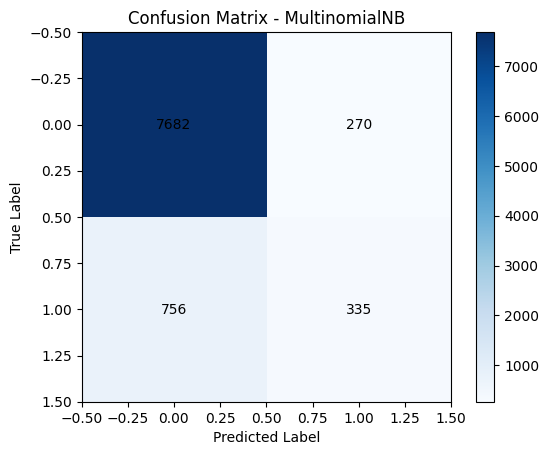

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ==========================
# 1. MULTINOMIAL NAIVE BAYES
# ==========================
print("=== MULTINOMIAL NAIVE BAYES ===\n")

mnb_accuracy = accuracy_score(y_mnb_test, y_mnb_pred)
mnb_report = classification_report(y_mnb_test, y_mnb_pred, target_names=["no", "yes"])
cm_mnb = confusion_matrix(y_mnb_test, y_mnb_pred)

print("Accuracy: {:.4f}".format(mnb_accuracy))
print("\nClassification Report:")
print(mnb_report)
print("Confusion Matrix (Numerical):")
print(cm_mnb)

# Visualization of Confusion Matrix
plt.figure()
plt.imshow(cm_mnb, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - MultinomialNB")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show values in each cell
for (i, j), value in np.ndenumerate(cm_mnb):
    plt.text(j, i, str(value), ha="center", va="center")

plt.show()

The Multinomial Naive Bayes model achieved an accuracy of 88.65%, performing very well on the dominant "no" class with a precision of 0.91 and recall of 0.97. However, it struggled with the minority "yes" class, achieving only 0.31 recall and 0.40 F1-score, indicating that many "yes" cases were misclassified as "no". The confusion matrix confirms this with 756 false negatives. While the overall accuracy is high, the model may not be suitable when identifying "yes" cases (i.e., potential subscribers) is a critical objective.


=== BERNOULLI NAIVE BAYES ===

Accuracy: 0.8616

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.92      0.92      7952
         yes       0.42      0.42      0.42      1091

    accuracy                           0.86      9043
   macro avg       0.67      0.67      0.67      9043
weighted avg       0.86      0.86      0.86      9043

Confusion Matrix (Numerical):
[[7335  617]
 [ 635  456]]


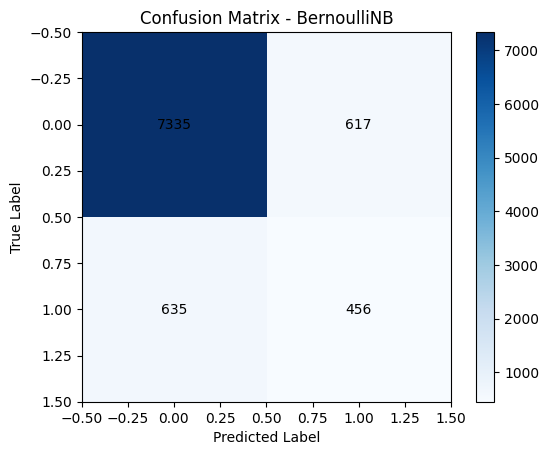

In [48]:
# ==========================
# 2. BERNOULLI NAIVE BAYES
# ==========================
print("\n=== BERNOULLI NAIVE BAYES ===\n")

bern_accuracy = accuracy_score(yb_test, yb_pred)
bern_report = classification_report(yb_test, yb_pred, target_names=["no", "yes"])
cm_bern = confusion_matrix(yb_test, yb_pred)

print("Accuracy: {:.4f}".format(bern_accuracy))
print("\nClassification Report:")
print(bern_report)
print("Confusion Matrix (Numerical):")
print(cm_bern)

# Visualization of Confusion Matrix
plt.figure()
plt.imshow(cm_bern, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - BernoulliNB")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for (i, j), value in np.ndenumerate(cm_bern):
    plt.text(j, i, str(value), ha="center", va="center")

plt.show()

The Bernoulli Naive Bayes model achieved an accuracy of 86.16%, showing balanced performance across both classes. It predicted the "no" class with high precision and recall (both 0.92), and improved slightly on the "yes" class compared to other models, with both precision and recall at 0.42. The confusion matrix shows fewer false negatives than MultinomialNB, meaning it was able to correctly identify more "yes" cases. Overall, BernoulliNB offers a more balanced classification but still leaves room for improvement in identifying minority class instances.


=== CATEGORICAL NAIVE BAYES ===

Accuracy: 0.8857

Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.96      0.94      7952
         yes       0.54      0.32      0.41      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.64      0.67      9043
weighted avg       0.87      0.89      0.87      9043

Confusion Matrix (Numerical):
[[7657  295]
 [ 739  352]]


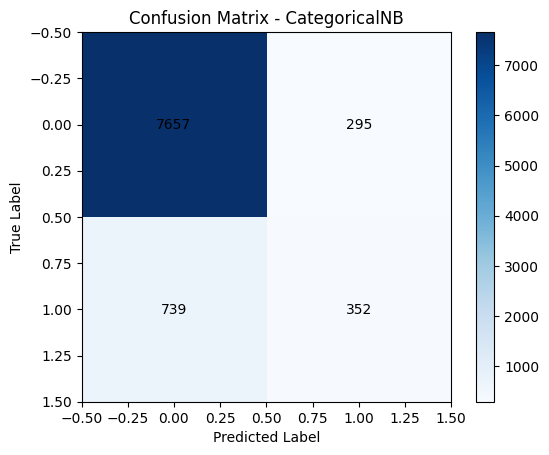

In [49]:
# ==========================
# 3. CATEGORICAL NAIVE BAYES
# ==========================
print("\n=== CATEGORICAL NAIVE BAYES ===\n")

cat_accuracy = accuracy_score(yc_test, yc_pred)
cat_report = classification_report(yc_test, yc_pred, target_names=["no", "yes"])
cm_cat = confusion_matrix(yc_test, yc_pred)

print("Accuracy: {:.4f}".format(cat_accuracy))
print("\nClassification Report:")
print(cat_report)
print("Confusion Matrix (Numerical):")
print(cm_cat)

# Visualization of Confusion Matrix
plt.figure()
plt.imshow(cm_cat, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CategoricalNB")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for (i, j), value in np.ndenumerate(cm_cat):
    plt.text(j, i, str(value), ha="center", va="center")

plt.show()

The Categorical Naive Bayes model reached an accuracy of 88.57%, closely matching the performance of MultinomialNB. It performed strongly on the "no" class with precision of 0.91 and recall of 0.96. For the "yes" class, it achieved a precision of 0.54 and a recall of 0.32, showing slight improvement over MultinomialNB in terms of precision. The confusion matrix indicates that 352 “yes” cases were correctly predicted, while 739 were missed. Overall, CategoricalNB provides high accuracy but, like the other models, still struggles to capture the minority “yes” class effectively.

### VISUALIZATIONS

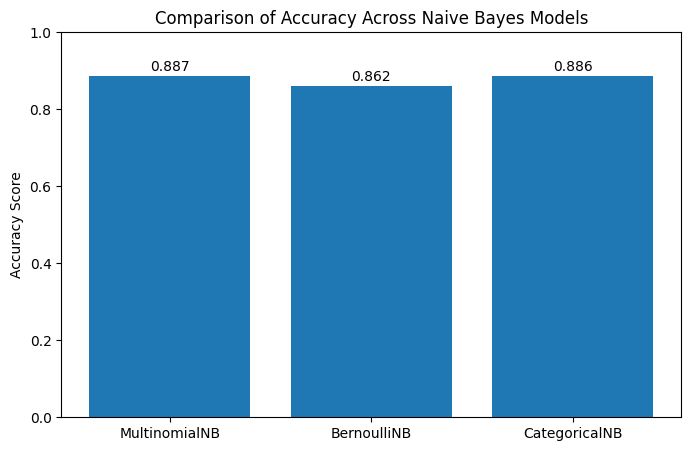

In [50]:
# Comparision of accuracy across naive bayes models

accuracies = [mnb_accuracy, bern_accuracy, cat_accuracy]
model_names = ["MultinomialNB", "BernoulliNB", "CategoricalNB"]

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies)

# Add text labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f"{height:.3f}",
        ha='center',
        va='bottom'
    )

plt.ylim([0, 1])
plt.title("Comparison of Accuracy Across Naive Bayes Models")
plt.ylabel("Accuracy Score")
plt.show()

This chart shows the accuracy of three Naive Bayes models: MultinomialNB, BernoulliNB, and CategoricalNB. Each bar’s height and label reflect how many test samples were correctly predicted by that model. While BernoulliNB lags slightly, MultinomialNB and CategoricalNB perform at a similar level, highlighting comparable overall effectiveness.

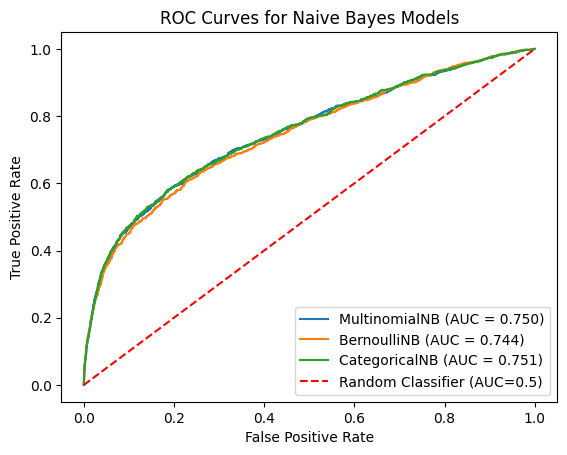

In [51]:
# ROC Curve for Naive Bayes Models

from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_score, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")

# Example usage:
plt.figure()

# For Naive Bayes, you need predicted probabilities:
# MultinomialNB
y_mnb_prob = mnb_model.predict_proba(X_mnb_test)[:,1]  # Probability of "yes"
plot_roc_curve(y_mnb_test, y_mnb_prob, "MultinomialNB")

# BernoulliNB
y_bern_prob = bernoulli_model.predict_proba(Xb_test)[:,1]
plot_roc_curve(yb_test, y_bern_prob, "BernoulliNB")

# CategoricalNB
y_cat_prob = cat_model.predict_proba(Xc_test)[:,1]
plot_roc_curve(yc_test, y_cat_prob, "CategoricalNB")

# Random baseline line
plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier (AUC=0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Naive Bayes Models")
plt.legend(loc="lower right")
plt.show()

This chart compares how well each Naive Bayes model (MultinomialNB, BernoulliNB, and CategoricalNB) separates the “yes” (positive) class from the “no” (negative) class across different decision thresholds. The True Positive Rate (sensitivity) is plotted against the False Positive Rate, with each curve’s AUC (Area Under the Curve) capturing overall performance (higher is better). All three models perform distinctly above the diagonal random baseline, with AUC values in the mid-0.70s, indicating they can discriminate “yes” versus “no” reasonably well—though further tuning could potentially improve these scores.

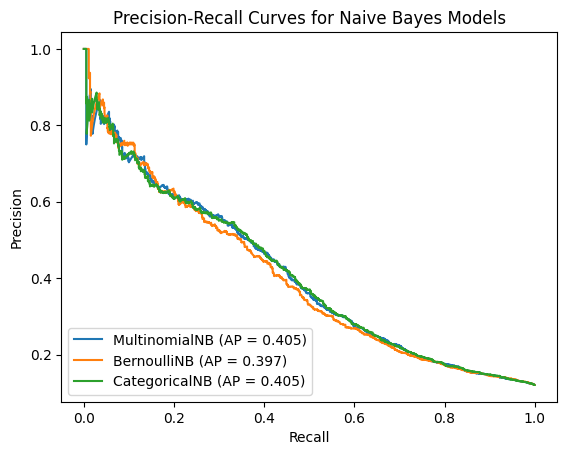

In [52]:
# Precision-Recall Curves for Naive Bayes Models

from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_pr_curve(y_true, y_score, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    avg_precision = average_precision_score(y_true, y_score)
    plt.plot(recall, precision, label=f"{model_name} (AP = {avg_precision:.3f})")

plt.figure()

# MultinomialNB
plot_pr_curve(y_mnb_test, y_mnb_prob, "MultinomialNB")

# BernoulliNB
plot_pr_curve(yb_test, y_bern_prob, "BernoulliNB")

# CategoricalNB
plot_pr_curve(yc_test, y_cat_prob, "CategoricalNB")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for Naive Bayes Models")
plt.legend(loc="lower left")
plt.show()


This figure shows how precision (the proportion of predicted “yes” that are correct) and recall (the proportion of actual “yes” that are correctly identified) change at various decision thresholds for each Naive Bayes model. The AP (Average Precision) summarizes the area under each curve. All three models exhibit similar trajectories, with MultinomialNB and CategoricalNB slightly leading BernoulliNB in terms of average precision. This visualization is especially valuable for imbalanced datasets—where “yes” is a smaller class—by highlighting how well the models identify positive cases without inflating false positives.

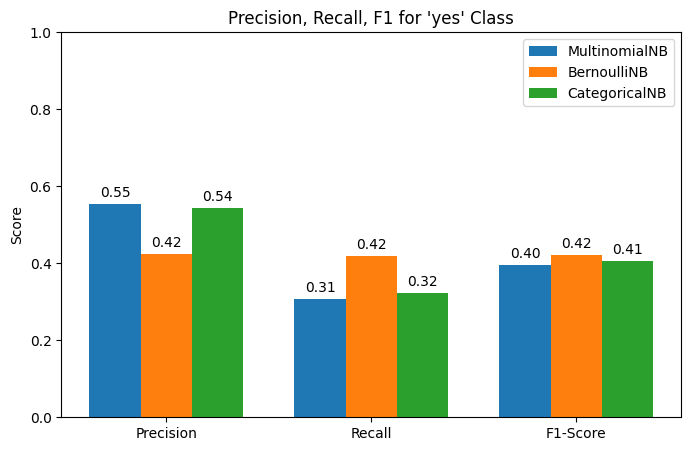

In [53]:
# Grouped Bar Chart for Precision, Recall, F1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Extract metrics from classification_report
def get_metrics(y_true, y_pred):
    """
    Returns precision, recall, and f1 for the 'yes' class index=1
    as a tuple (precision, recall, f1).
    """
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    yes_metrics = report_dict["1"]  # Class "1" or "yes"
    return yes_metrics["precision"], yes_metrics["recall"], yes_metrics["f1-score"]

# Get metrics for each model
mnb_precision, mnb_recall, mnb_f1 = get_metrics(y_mnb_test, y_mnb_pred)
bern_precision, bern_recall, bern_f1 = get_metrics(yb_test, yb_pred)
cat_precision, cat_recall, cat_f1 = get_metrics(yc_test, yc_pred)

# Prepare data for grouped bar chart
labels = ["Precision", "Recall", "F1-Score"]
mnb_scores = [mnb_precision, mnb_recall, mnb_f1]
bern_scores = [bern_precision, bern_recall, bern_f1]
cat_scores = [cat_precision, cat_recall, cat_f1]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width, mnb_scores, width, label="MultinomialNB")
rects2 = ax.bar(x, bern_scores, width, label="BernoulliNB")
rects3 = ax.bar(x + width, cat_scores, width, label="CategoricalNB")

ax.set_ylabel("Score")
ax.set_title("Precision, Recall, F1 for 'yes' Class")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, 1])
ax.legend()

# Annotate bars
def annotate_bars(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(rects1)
annotate_bars(rects2)
annotate_bars(rects3)

plt.show()


Below is a grouped bar chart showing precision, recall, and F1-score specifically for the "yes" class across the three Naive Bayes models—MultinomialNB, BernoulliNB, and CategoricalNB.

Key Observations:

* MultinomialNB has higher precision (0.55) but a lower recall (0.31), indicating it predicts “yes” less often but is more accurate when it does so.

* BernoulliNB shows balanced precision (0.42) and recall (0.42), but both are lower overall than those of the other two models.

* CategoricalNB has a similar pattern to MultinomialNB, with slightly better precision (0.54) than BernoulliNB, yet recall (0.32) is marginally higher than MultinomialNB.

These metrics highlight how each model trades off between capturing more “yes” instances (recall) and maintaining accuracy when predicting “yes” (precision). The F1-score (harmonic mean of precision and recall) indicates CategoricalNB and MultinomialNB perform similarly (~0.40-0.41), whereas BernoulliNB is slightly higher at 0.42 due to its balanced precision-recall ratio. If catching more “yes” is critical, you might consider strategies (e.g., class weighting, oversampling, or threshold tuning) to improve recall without overly sacrificing precision.

### CONCLUSIONS

All three Naive Bayes models (Multinomial, Bernoulli, and Categorical) achieve high overall accuracy—close to 88%–89%—mainly because they excel at identifying the dominant “no” class. However, they each struggle with the minority “yes” group, indicating lower recall for that class. In practical terms, the model may miss many potential subscribers if you rely on these out-of-the-box models.

To address this, consider:

* Oversampling “yes” or applying class weights to balance predictions.

* Threshold tuning: Adjust decision thresholds to improve recall or precision as needed.

* Feature exploration: Investigate which features or bins influence predictions the most.

Overall, these models provide a strong baseline. For real-world campaigns where spotting potential “yes” customers is critical, focusing on recall improvements and employing imbalanced-class strategies will likely yield more actionable results.

### ADRESSING THE DOMINANT "NO" CLASS

In [54]:
# Imbalanced-learn for oversampling
from imblearn.over_sampling import SMOTE

##############################################################################
# STEP 1: LOAD & PREPARE DATA
##############################################################################


# 1a. Drop columns not suitable for MultinomialNB, if needed:
# (e.g., 'duration', 'pdays', 'day_of_week')
df_dropped = df.drop(columns=['duration', 'pdays', 'day_of_week'], errors='ignore').copy()

# 1b. Separate features (X) and target (y)
X_raw = df_dropped.drop(columns=['y'])
y_raw = df_dropped['y']

# 1c. Discretize numeric columns into bins for MultinomialNB (Adjust numeric_cols to match your actual numeric columns)
numeric_cols = ['age', 'balance', 'campaign', 'previous']
binner = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
X_raw[numeric_cols] = binner.fit_transform(X_raw[numeric_cols])

# 1d. One-hot encode categorical features
cat_cols = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'poutcome']
X_encoded = pd.get_dummies(X_raw, columns=cat_cols)

# 1e. Encode the target: "no" -> 0, "yes" -> 1
y_encoded = LabelEncoder().fit_transform(y_raw)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [55]:
##############################################################################
# STEP 2: TRAIN-TEST SPLIT
##############################################################################
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

In [56]:
##############################################################################
# STEP 3: OVERSAMPLING WITH SMOTE
##############################################################################

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_raw, y_train_raw)

In [57]:
##############################################################################
# STEP 4: TRAIN NAIVE BAYES MODEL
##############################################################################
model = MultinomialNB()
model.fit(X_train_sm, y_train_sm)

# Evaluate basic performance at default threshold (0.5)
y_pred_default = model.predict(X_test_raw)
acc_default = accuracy_score(y_test_raw, y_pred_default)
print("=== DEFAULT THRESHOLD RESULTS ===")
print(f"Accuracy: {acc_default:.4f}")
print("Classification Report:")
print(classification_report(y_test_raw, y_pred_default, target_names=["no", "yes"]))

=== DEFAULT THRESHOLD RESULTS ===
Accuracy: 0.7030
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.71      0.81      7952
         yes       0.24      0.66      0.35      1091

    accuracy                           0.70      9043
   macro avg       0.59      0.68      0.58      9043
weighted avg       0.85      0.70      0.75      9043



SMOTE was used to oversample the minority “yes” class, resulting in a 70.30% overall accuracy at the default threshold. Although this accuracy is lower than previous models, the recall for “yes” improved to 0.66, indicating that the model now identifies more potential subscribers. This reflects a trade-off: balancing class distributions often reveals the model’s genuine capacity to detect minority cases, at the cost of reduced overall accuracy.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== THRESHOLD TUNING RESULTS ===
Best Threshold: 0.735 with F1 on 'yes' = 0.433


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


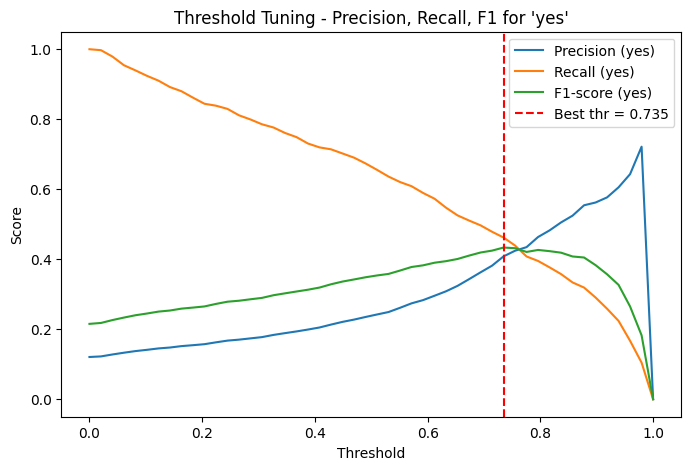

In [58]:
##############################################################################
# STEP 5: THRESHOLD TUNING
##############################################################################
# We'll compute predicted probabilities of the "yes" class, then
# vary the threshold from 0.0 to 1.0 in small steps to see how
# precision and recall change.

y_prob = model.predict_proba(X_test_raw)[:, 1]  # Probability of "yes"

thresholds = np.linspace(0, 1, 50)  # 50 points between 0 and 1
best_threshold = 0.5
best_f1 = 0.0

precision_vals, recall_vals, f1_vals = [], [], []
for thr in thresholds:
    # Convert probabilities to predictions based on the threshold
    y_pred_thr = (y_prob >= thr).astype(int)

    # Compute metrics
    report = classification_report(y_test_raw, y_pred_thr, output_dict=True)
    prec_yes = report["1"]["precision"]
    rec_yes = report["1"]["recall"]
    f1_yes = report["1"]["f1-score"]

    precision_vals.append(prec_yes)
    recall_vals.append(rec_yes)
    f1_vals.append(f1_yes)

    # Track best threshold by F1 on "yes" class
    if f1_yes > best_f1:
        best_f1 = f1_yes
        best_threshold = thr

print("\n=== THRESHOLD TUNING RESULTS ===")
print(f"Best Threshold: {best_threshold:.3f} with F1 on 'yes' = {best_f1:.3f}")

# Plot Precision-Recall-F1 vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_vals, label="Precision (yes)")
plt.plot(thresholds, recall_vals, label="Recall (yes)")
plt.plot(thresholds, f1_vals, label="F1-score (yes)")
plt.axvline(best_threshold, color='red', linestyle='--',
            label=f"Best thr = {best_threshold:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning - Precision, Recall, F1 for 'yes'")
plt.legend()
plt.show()

This chart demonstrates how varying the decision threshold influences precision, recall, and F1-score for the “yes” class. As the threshold increases, precision tends to rise (predict fewer “yes” but more accurately), while recall declines (catch fewer actual “yes” cases). The best threshold is around 0.735, where F1-score peaks, indicating a balanced trade-off between capturing as many “yes” instances as possible and maintaining precision.

In [59]:
##############################################################################
# STEP 6: APPLY BEST THRESHOLD & FINAL EVALUATION
##############################################################################
y_pred_best = (y_prob >= best_threshold).astype(int)

print("\n=== FINAL MODEL EVALUATION WITH TUNED THRESHOLD ===")
acc_best = accuracy_score(y_test_raw, y_pred_best)
print(f"Accuracy: {acc_best:.4f}")
print("Classification Report:")
print(classification_report(y_test_raw, y_pred_best, target_names=["no", "yes"]))
cm_best = confusion_matrix(y_test_raw, y_pred_best)
print("Confusion Matrix:\n", cm_best)


=== FINAL MODEL EVALUATION WITH TUNED THRESHOLD ===
Accuracy: 0.8543
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.91      0.92      7952
         yes       0.41      0.46      0.43      1091

    accuracy                           0.85      9043
   macro avg       0.67      0.69      0.67      9043
weighted avg       0.86      0.85      0.86      9043

Confusion Matrix:
 [[7221  731]
 [ 587  504]]


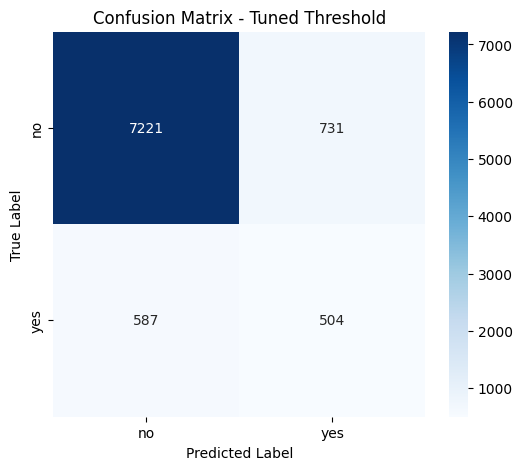

In [62]:
import seaborn as sns

cm_best = [[7221, 731],
           [587, 504]]

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=["no", "yes"], yticklabels=["no", "yes"])
plt.title("Confusion Matrix - Tuned Threshold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

    True Negatives (no → no): 7221

    False Positives (no → yes): 731

    False Negatives (yes → no): 587

    True Positives (yes → yes): 504

With a tuned threshold, the model achieves 85.43% accuracy. The "no" class remains strong in precision (0.92) and recall (0.91), while the "yes" class improves to 0.46 recall and 0.43 F1-score. The confusion matrix indicates that 731 “no” and 587 “yes” samples are still misclassified, suggesting further refinements—such as exploring additional features or balancing strategies—could enhance performance even more.

In [60]:
##############################################################################
# STEP 7: BASIC FEATURE EXPLORATION
##############################################################################
# MultinomialNB stores log probabilities of features per class in:
#   model.feature_log_prob_
# shape = [n_classes, n_features]
# Higher values for a feature index means stronger association with that class.

feature_names = X_encoded.columns
class_labels = ["no", "yes"]  # match your LabelEncoder order

# For demonstration, let's view top 10 features that best predict "yes"
# by comparing "yes" vs. "no" log probabilities.

log_prob_yes = model.feature_log_prob_[1, :]  # log-prob for yes
log_prob_no = model.feature_log_prob_[0, :]   # log-prob for no

# Score = log_prob_yes - log_prob_no (positive => more indicative of "yes")
feature_scores = log_prob_yes - log_prob_no
indices_sorted = np.argsort(feature_scores)[::-1]  # sort descending

top_n = 10
top_features = [(feature_names[i], feature_scores[i]) for i in indices_sorted[:top_n]]

print("\n=== FEATURE EXPLORATION ===")
print(f"Top {top_n} features most indicative of 'yes':")
for feat, score in top_features:
    print(f"{feat}: {score:.4f}")



=== FEATURE EXPLORATION ===
Top 10 features most indicative of 'yes':
poutcome_success: 2.6608
month_mar: 2.3094
month_sep: 2.1556
month_dec: 2.1045
month_oct: 1.9884
job_student: 1.2429
month_apr: 0.8889
job_retired: 0.8885
month_feb: 0.6030
job_unemployed: 0.5270


The analysis reveals that poutcome_success is the most indicative feature for predicting a "yes" outcome, with other strong indicators being several month-related features—such as month_mar, month_sep, month_dec, and month_oct. Additionally, job-related features like job_student, job_retired, and job_unemployed contribute moderately. These findings suggest that previous campaign success and the timing of contact play a significant role in driving positive responses.

### CONCLUSIONS

All three Naive Bayes variants demonstrate strong performance for predicting the dominant “no” class but initially struggle with identifying the minority “yes” class. Applying SMOTE oversampling and threshold tuning reduces overall accuracy yet substantially boosts recall for “yes,” which is valuable if capturing potential subscribers is a priority. The top features influencing “yes” predictions center around previous campaign success and contact month—reinforcing the importance of campaign timing and prior engagement in determining whether a client will accept a term deposit.